1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

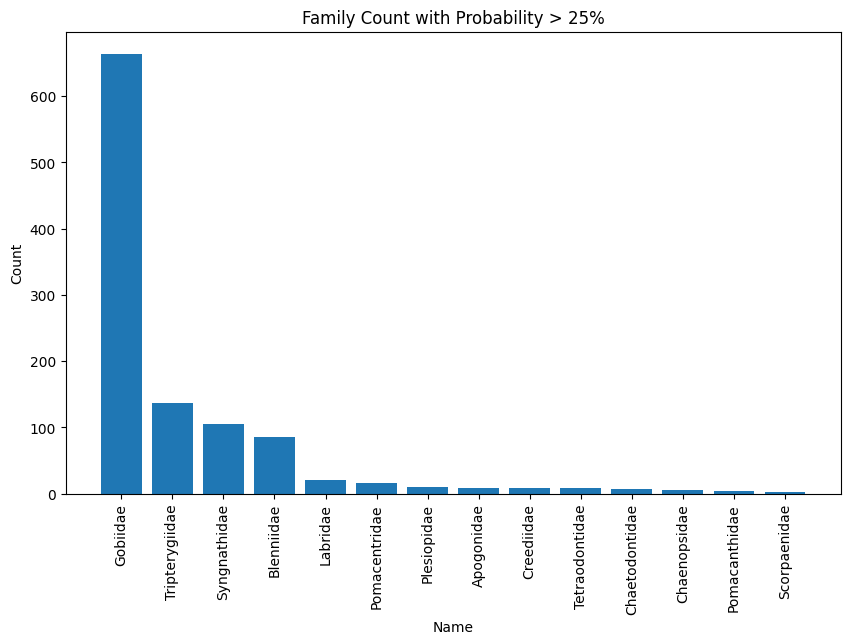

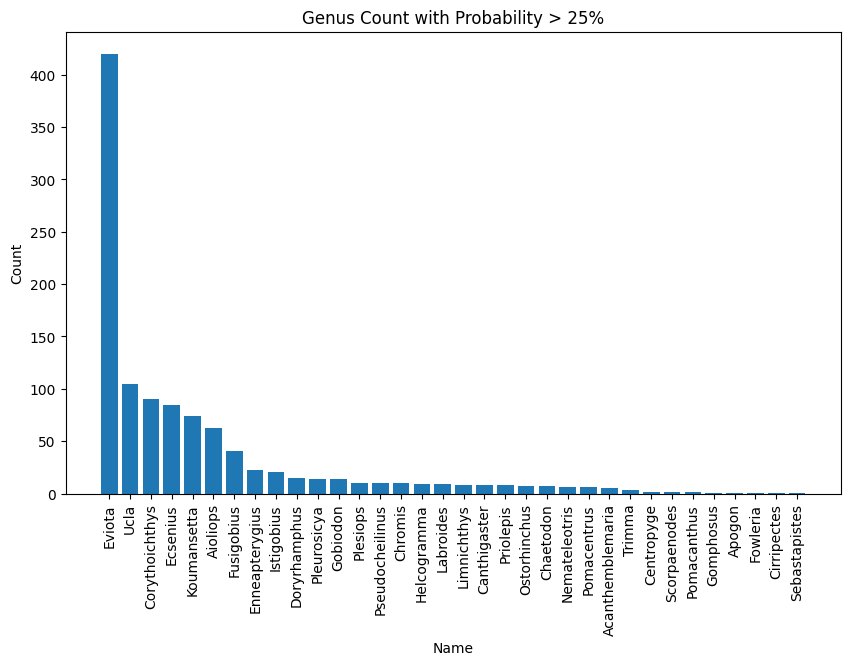

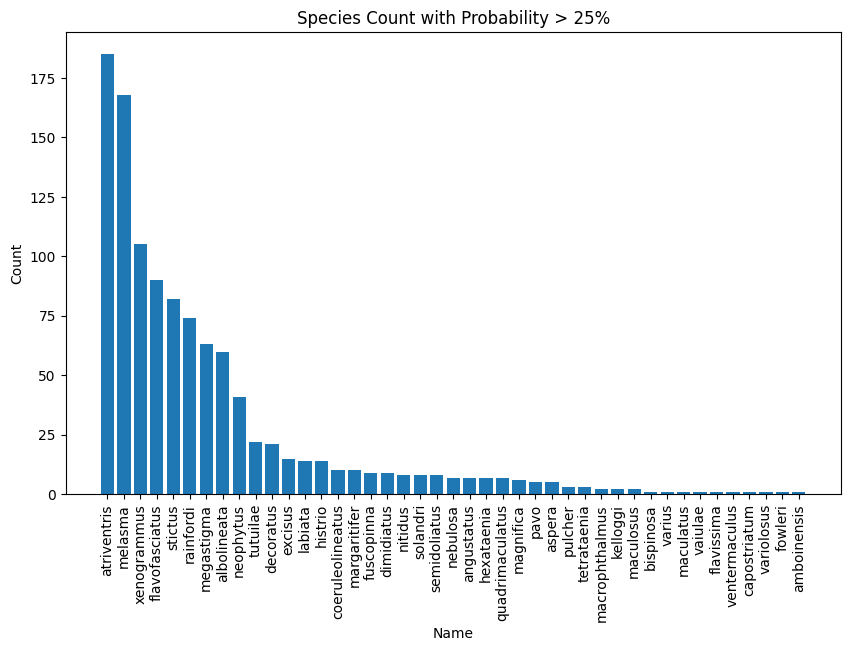

In [7]:
# EfficientNet Model Performance Exploration Notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image
import os
import json

# Load model and class indices
def load_class_names_and_model(model_path, class_indices_path):
    with open(class_indices_path, 'r') as f:
        class_names = json.load(f)
    model = load_model(model_path)
    return class_names, model

# Predict image
def predict_image(model, img, class_names):
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    probs = model.predict(img_array)
    top_prob = probs.max()
    top_pred = class_names[str(np.argmax(probs))]
    return top_prob, top_pred, probs

# Load test images and true labels
def load_test_images(test_images_dir):
    test_images = []
    true_labels = []
    for root, _, files in os.walk(test_images_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')) and not file.startswith('.'):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                label = os.path.basename(root)  # Assuming folder name is the label
                test_images.append((img, label))
                true_labels.append(label)
    return test_images, true_labels

# Evaluate model on test set
def evaluate_model(model, test_images, true_labels, class_names):
    predictions = []
    all_probs = []
    for img, _ in test_images:
        top_prob, top_pred, probs = predict_image(model, img, class_names)
        predictions.append(top_pred)
        all_probs.append(probs[0])
    
    # Generate classification report
    report = classification_report(true_labels, predictions, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    return df_report, cm, predictions, all_probs

# Analyze predictions with probability higher than 10%
def analyze_high_prob_predictions(predictions, all_probs, class_names):
    high_prob_preds = []
    for probs in all_probs:
        for idx, prob in enumerate(probs):
            if prob > 0.25:
                high_prob_preds.append(class_names[str(idx)])
    
    # Split taxonomy and count occurrences
    family_count = {}
    genus_count = {}
    species_count = {}
    
    for pred in high_prob_preds:
        family, genus, species = pred.split('_')
        
        family_count[family] = family_count.get(family, 0) + 1
        genus_count[genus] = genus_count.get(genus, 0) + 1
        species_count[species] = species_count.get(species, 0) + 1
    
    return family_count, genus_count, species_count

# Plot counts
def plot_counts(count_dict, title):
    plt.figure(figsize=(10, 6))
    items = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
    keys, values = zip(*items)
    plt.bar(keys, values)
    plt.xticks(rotation=90)
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Paths
model_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/model.h5'
class_indices_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/class_indices.json'
test_images_dir = '/Volumes/T7_shield/CryptoVision/data/genus_dataset/Eviota'

# Load model and class indices
class_names, model = load_class_names_and_model(model_path, class_indices_path)

# Load test images
test_images, true_labels = load_test_images(test_images_dir)

# Evaluate model
df_report, cm, predictions, all_probs = evaluate_model(model, test_images, true_labels, class_names)

# Display classification report
print("Classification Report")
print(df_report)

# Plot confusion matrix
#plot_confusion_matrix(cm, list(class_names.values()))

# Analyze high probability predictions
family_count, genus_count, species_count = analyze_high_prob_predictions(predictions, all_probs, class_names)

# Plot counts
plot_counts(family_count, 'Family Count with Probability > 25%')
plot_counts(genus_count, 'Genus Count with Probability > 25%')
plot_counts(species_count, 'Species Count with Probability > 25%')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import json
from PIL import Image

# Load model and class indices
def load_class_names_and_model(model_path, class_indices_path):
    with open(class_indices_path, 'r') as f:
        class_names = json.load(f)
    model = load_model(model_path)
    return class_names, model

# Predict image with probabilities higher than 10%
def predict_image_high_prob(model, img_path, class_names):
    img = Image.open(img_path)
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    probs = model.predict(img_array)[0]
    
    high_prob_predictions = []
    for idx, prob in enumerate(probs):
        if prob > 0.10:
            high_prob_predictions.append((class_names[str(idx)], prob))
    
    return high_prob_predictions

# Split taxonomy string and count occurrences
def split_taxonomy_and_count(predictions):
    family_count = {}
    genus_count = {}
    species_count = {}
    
    for pred, prob in predictions:
        family, genus, species = pred.split('_')
        
        family_count[family] = family_count.get(family, 0) + 1
        genus_count[genus] = genus_count.get(genus, 0) + 1
        species_count[species] = species_count.get(species, 0) + 1
    
    return family_count, genus_count, species_count

# Paths
model_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/model.h5'
class_indices_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/class_indices.json'

# Load model and class indices
class_names, model = load_class_names_and_model(model_path, class_indices_path)

# Image path
image_path = '/Volumes/T7_shield/CryptoVision/Misc/google_images_source/Pseudochromidae_Pseudochromis_flammicauda/PseudochromFlammicaudRW.jpg'

# Get high probability predictions
high_prob_predictions = predict_image_high_prob(model, image_path, class_names)

# Print predictions
print("Predictions with probability higher than 10%:")
for pred, prob in high_prob_predictions:
    print(f"{pred}: {prob*100:.2f}%")

# Split taxonomy and count occurrences
family_count, genus_count, species_count = split_taxonomy_and_count(high_prob_predictions)

# Print counts
print("\nFamily count:")
print(family_count)

print("\nGenus count:")
print(genus_count)

print("\nSpecies count:")
print(species_count)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predictions with probability higher than 10%:
Blenniidae_Ecsenius_pulcher: 40.22%
Blenniidae_Enchelyurus_ater: 38.85%

Family count:
{'Blenniidae': 2}

Genus count:
{'Ecsenius': 1, 'Enchelyurus': 1}

Species count:
{'pulcher': 1, 'ater': 1}


In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image
import json
from tqdm import tqdm

# Load model and class indices
def load_class_names_and_model(model_path, class_indices_path):
    with open(class_indices_path, 'r') as f:
        class_names = json.load(f)
    model = load_model(model_path)
    return class_names, model

# Predict image and return the highest predicted class and its probability
def predict_image(model, img_path, class_names):
    img = Image.open(img_path)
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    probs = model.predict(img_array, verbose=False)[0]
    
    top_idx = np.argmax(probs)
    top_prob = probs[top_idx]
    top_pred = class_names[str(top_idx)]
    
    return top_pred, top_prob

# Process all images in a folder and create a DataFrame with predictions
def process_images_in_folder(folder_path, models_and_classes, model_names):
    image_paths = []
    predictions = {f'predicted_class_{model_name}': [] for model_name in model_names}
    probabilities = {f'probability_{model_name}': [] for model_name in model_names}

    for root, _, files in os.walk(folder_path):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')) and not file.startswith('.'):
                img_path = os.path.join(root, file)

                image_paths.append(img_path)
                
                for i, (model, class_names) in enumerate(models_and_classes):
                    top_pred, top_prob = predict_image(model, img_path, class_names)
                    predictions[f'predicted_class_{model_names[i]}'].append(top_pred)
                    probabilities[f'probability_{model_names[i]}'].append(top_prob)
    
    data = {'image_path': image_paths}
    data.update(predictions)
    data.update(probabilities)
    
    df = pd.DataFrame(data)
    
    return df

# Paths
models_list = [
    'BV_label_RES50V2_S913_202408060228',
    'BV_label_EFFV2B2_S931_202408011557',
    'BV_label_EFFv2B0_S910_202407182355',
    'BV_label_EFFV2B0_S912_202407311711',
    'BV_label_EFFV2S_S933_202408061328',
]

models_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/species'

image_folder_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/web_scrapping/species/train/Tripterygiidae_Ucla_xenogrammus'

# Load models and class indices
models_and_classes = []
for model_name in models_list:
    class_names, model = load_class_names_and_model(os.path.join(models_path, model_name, 'model.h5'), os.path.join(models_path, model_name, 'class_indices.json'))
    models_and_classes.append((model, class_names))

# Process images and create DataFrame
df_predictions = process_images_in_folder(image_folder_path, models_and_classes, models_list)

2024-08-07 12:10:02.983693: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-07 12:10:02.983713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-08-07 12:10:02.983718: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-08-07 12:10:02.983753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-07 12:10:02.983765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
  0%|          | 0/108 [00:00<?, ?it/s]2024-08-07 12:10:09.041274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU

100%|██████████| 108/108 [00:53<00:00,  2.02it/s]


In [2]:
df_predictions.tail(100)


,image_path,predicted_class_BV_label_RES50V2_S913_202408060228,predicted_class_BV_label_EFFV2B2_S931_202408011557,predicted_class_BV_label_EFFv2B0_S910_202407182355,predicted_class_BV_label_EFFV2B0_S912_202407311711,predicted_class_BV_label_EFFV2S_S933_202408061328,probability_BV_label_RES50V2_S913_202408060228,probability_BV_label_EFFV2B2_S931_202408011557,probability_BV_label_EFFv2B0_S910_202407182355,probability_BV_label_EFFV2B0_S912_202407311711,probability_BV_label_EFFV2S_S933_202408061328
7,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.999994,0.901161,0.997726,0.842922,0.995220
8,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Gobiidae_Priolepis_semidoliatus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.995871,0.231729,0.996154,0.408792,0.993876
9,/Users/leonardo/Library/CloudStorage/GoogleDri...,Labridae_Gomphosus_varius,Syngnathidae_Corythoichthys_flavofasciatus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.999995,0.344747,0.921235,0.532030,0.568106
10,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Tripterygiidae_Ucla_xenogrammus,Gobiidae_Eviota_melasma,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.999996,0.772627,0.767323,0.326445,0.994624
11,/Users/leonardo/Library/CloudStorage/GoogleDri...,Labridae_Gomphosus_varius,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Gobiidae_Eviota_albolineata,0.864570,0.911688,0.877768,0.430878,0.595381
...,...,...,...,...,...,...,...,...,...,...,...
102,/Users/leonardo/Library/CloudStorage/GoogleDri...,Labridae_Gomphosus_varius,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.988649,0.842355,0.992981,0.915826,0.986918
103,/Users/leonardo/Library/CloudStorage/GoogleDri...,Labridae_Gomphosus_varius,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.963851,0.853513,0.636904,0.808828,0.997525
104,/Users/leonardo/Library/CloudStorage/GoogleDri...,Labridae_Gomphosus_varius,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.725374,0.982211,0.996651,0.916521,0.985365
105,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,Tripterygiidae_Ucla_xenogrammus,0.994924,0.907769,0.973422,0.876827,0.983450


In [3]:
df_predictions.columns

Index(['image_path', 'predicted_class_BV_label_RES50V2_S913_202408060228',
       'predicted_class_BV_label_EFFV2B2_S931_202408011557',
       'predicted_class_BV_label_EFFv2B0_S910_202407182355',
       'predicted_class_BV_label_EFFV2B0_S912_202407311711',
       'predicted_class_BV_label_EFFV2S_S933_202408061328',
       'probability_BV_label_RES50V2_S913_202408060228',
       'probability_BV_label_EFFV2B2_S931_202408011557',
       'probability_BV_label_EFFv2B0_S910_202407182355',
       'probability_BV_label_EFFV2B0_S912_202407311711',
       'probability_BV_label_EFFV2S_S933_202408061328'],
      dtype='object')

In [ ]:
df_predictions['avg_prediction'] = (
    df_predictions['predicted_class_BV_label_EFFV2B2_S931_202408011557'] +
    df_predictions['predicted_class_BV_label_EFFV2B0_S912_202407311711'] +
    df_predictions['predicted_class_BV_label_EFFV2S_S933_202408061328'] +
    df_predictions['predicted_class_BV_label_EFFV2S_S933_202408061328'] +
)

In [6]:
df_predictions['image_path'][15]

'/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/web_scrapping/species/train/Apogonidae_Ostorhinchus_angustatus/web_Ostorhinchus_angustatus_87.jpeg'

In [4]:
df_predictions['predicted_class_model2'].unique()

array(['Apogonidae_Ostorhinchus_angustatus',
       'Apogonidae_Pristiapogon_kallopterus',
       'Gobiidae_Koumansetta_rainfordi', 'Labridae_Halichoeres_claudia'],
      dtype=object)

In [18]:
import shutil

def save_images_in_species_folders(df, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    
    for index, row in df.iterrows():
        if row['predicted_class_model1'] == row['predicted_class_model2']:
            mean_prob = (row['probability_model1'] + row['probability_model2']) / 2
            if mean_prob > 0.6:
                species = row['predicted_class_model1']
                species_folder = os.path.join(output_folder_path, species)
                if not os.path.exists(species_folder):
                    os.makedirs(species_folder)
                shutil.copy(row['image_path'], species_folder)

save_images_in_species_folders(df_predictions, '/Volumes/T7_shield/CryptoVision/Data/species_rmbg_predicted')

In [9]:
df_pred_1 = df_predictions[['image_path','probability','predicted_class']].copy()

df_pred_1.head()

,image_path,probability,predicted_class
0,/Volumes/T7_shield/CryptoVision/data/clear_rmb...,0.996456,Gobiidae_Lythrypnus_nesiotes
1,/Volumes/T7_shield/CryptoVision/data/clear_rmb...,0.996480,Tripterygiidae_Enneapterygius_pyramis
2,/Volumes/T7_shield/CryptoVision/data/clear_rmb...,0.255703,Gobiidae_Eviota_melasma
3,/Volumes/T7_shield/CryptoVision/data/clear_rmb...,0.685964,Tripterygiidae_Enneapterygius_ventermaculus
4,/Volumes/T7_shield/CryptoVision/data/clear_rmb...,0.753016,Gobiidae_Eviota_nebulosa


In [19]:
df_predictions.to_csv('predictions_sjb_rmbg_clean.csv')

In [6]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image
import json
from tqdm import tqdm

# Load model and class indices
def load_class_names_and_model(model_path, class_indices_path):
    with open(class_indices_path, 'r') as f:
        class_names = json.load(f)
    model = load_model(model_path)
    return class_names, model

# Predict image and return a dictionary with top N class names and their predicted probabilities
def predict_image(model, img_path, class_names, top_n=5):
    img = Image.open(img_path)
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    probs = model.predict(img_array, verbose=False)[0]
    
    # Create a dictionary of class names and probabilities
    predictions = {class_names[str(i)]: float(probs[i]) for i in range(len(probs))}
    
    # Sort the predictions by probability in descending order and get the top N
    sorted_predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True)[:top_n])
    
    return sorted_predictions

# Combine model predictions and calculate the summed probabilities
def combine_model_predictions(all_probs, models_and_classes):
    combined_class_probs = {}

    for i, class_probs in enumerate(all_probs):
        for class_name, prob in class_probs.items():
            if class_name not in combined_class_probs:
                combined_class_probs[class_name] = 0.0
            combined_class_probs[class_name] += prob
    
    # Get the top predicted class with the maximum summed probability
    top_class = max(combined_class_probs, key=combined_class_probs.get)
    top_sum_prob = combined_class_probs[top_class]
    
    return top_class, top_sum_prob

# Process all images in a folder and create a DataFrame with predictions
def process_images_in_folder(folder_path, models_and_classes, top_n=5):
    image_paths = []
    predictions = {f'predicted_class_model{i+1}': [] for i in range(len(models_and_classes))}
    probabilities = {f'probability_model{i+1}': [] for i in range(len(models_and_classes))}
    combined_results = []

    for root, _, files in os.walk(folder_path):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png', 'JPG','JPEG')) and not file.startswith('.'):
                img_path = os.path.join(root, file)

                image_paths.append(img_path)
                
                all_probs = []
                for i, (model, class_names) in enumerate(models_and_classes):
                    model_predictions = predict_image(model, img_path, class_names, top_n)
                    all_probs.append(model_predictions)
                    top_pred = list(model_predictions.keys())[0]
                    top_prob = list(model_predictions.values())[0]

                    predictions[f'predicted_class_model{i+1}'].append(top_pred)
                    probabilities[f'probability_model{i+1}'].append(top_prob)

                top_combined_class, top_combined_prob = combine_model_predictions(all_probs, models_and_classes)
                combined_results.append((top_combined_class, top_combined_prob))

    data = {'image_path': image_paths}
    data.update(predictions)
    data.update(probabilities)
    
    combined_results_df = pd.DataFrame(combined_results, columns=['top_combined_class', 'top_combined_prob'])
    df = pd.concat([pd.DataFrame(data), combined_results_df], axis=1)
    
    return df

# Paths
model_paths = [
    {
        'model_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFv2B0_S910_202407182355/model.h5',
        'class_indices_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFv2B0_S910_202407182355/class_indices.json',
    },
    {
        'model_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B0_S912_202407311711/model.h5',
        'class_indices_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B0_S912_202407311711/class_indices.json',
    },
    {
        'model_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B0_S921_202408011035/model.h5',
        'class_indices_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B0_S921_202408011035/class_indices.json',
    },
    {
        'model_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B2_S931_202408011557/model.h5',
        'class_indices_path':'/Users/leonardo/Documents/Projects/crypto_vision/models/select/BV_label_EFFV2B2_S931_202408011557/class_indices.json',
    },
    
]

image_folder_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training/train/Chaenopsidae_Acanthemblemaria_aspera'

# Load models and class indices
models_and_classes = []
for model_info in model_paths:
    class_names, model = load_class_names_and_model(model_info['model_path'], model_info['class_indices_path'])
    models_and_classes.append((model, class_names))

# Process images and create DataFrame
df_predictions = process_images_in_folder(image_folder_path, models_and_classes, top_n=5)

# Display the DataFrame
#print(df_predictions)

# Optionally, save the DataFrame to a CSV file
#output_csv_path = 'predictions.csv'
#df_predictions.to_csv(output_csv_path, index=False)

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████| 69/69 [00:44<00:00,  1.55it/s]


In [9]:
df_predictions['top_combined_prob_avg'] = df_predictions['top_combined_prob'] / 4
df_predictions.loc[df_predictions['top_combined_class'] != image_folder_path.split('/')[-1], 'top_combined_prob_avg'] = 0
df_predictions.head(10)

,image_path,predicted_class_model1,predicted_class_model2,predicted_class_model3,predicted_class_model4,probability_model1,probability_model2,probability_model3,probability_model4,top_combined_class,top_combined_prob,top_combined_prob_avg
0,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.997192,0.989420,0.982701,0.979624,Chaenopsidae_Acanthemblemaria_aspera,3.948937,0.987234
1,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.999904,0.909910,0.855003,0.461710,Chaenopsidae_Acanthemblemaria_aspera,3.226528,0.806632
2,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.994836,0.989850,0.990008,0.997460,Chaenopsidae_Acanthemblemaria_aspera,3.972154,0.993039
3,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.953010,0.986544,0.955442,0.921892,Chaenopsidae_Acanthemblemaria_aspera,3.816887,0.954222
4,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Sciaenidae_Eques_punctatus,Tripterygiidae_Enneapterygius_ventermaculus,0.986342,0.375462,0.180803,0.174202,Chaenopsidae_Acanthemblemaria_aspera,1.590331,0.397583
5,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.999253,0.550803,0.441871,0.602047,Chaenopsidae_Acanthemblemaria_aspera,2.593973,0.648493
6,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.998233,0.991034,0.993171,0.995001,Chaenopsidae_Acanthemblemaria_aspera,3.977439,0.994360
7,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.978697,0.994237,0.980478,0.931723,Chaenopsidae_Acanthemblemaria_aspera,3.885135,0.971284
8,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.999191,0.991299,0.996015,0.996300,Chaenopsidae_Acanthemblemaria_aspera,3.982805,0.995701
9,/Users/leonardo/Library/CloudStorage/GoogleDri...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae_Acanthemblemaria_aspera,0.910864,0.974843,0.989751,0.380912,Chaenopsidae_Acanthemblemaria_aspera,3.256370,0.814093


In [15]:
import os

def rename_images_with_prefix(df, prefix_column, image_path_column):
    new_image_paths = []

    for index, row in df.iterrows():
        original_path = row[image_path_column]
        prefix = int(row[prefix_column] * 100_000)

        # Generate the new file name with the prefix
        dir_name, original_file_name = os.path.split(original_path)
        new_file_name = f"{prefix}_{original_file_name}"
        new_file_path = os.path.join(dir_name, new_file_name)

        # Rename the file
        os.rename(original_path, new_file_path)
        
        # Update the new image path
        new_image_paths.append(new_file_path)

    # Update the DataFrame with the new image paths
    df[image_path_column] = new_image_paths
    return df

# Example usage:
df_predictions = rename_images_with_prefix(df_predictions, 'top_combined_prob_avg', 'image_path')

# Optionally, save the updated DataFrame to a CSV file
#output_csv_path = 'updated_predictions.csv'
#df_predictions.to_csv(output_csv_path, index=False)

In [1]:
import os
import shutil

def move_images_by_prefix(source_path, destination_path, prefix="0_"):
    for root, dirs, files in os.walk(source_path):
        for file in files:
            if file.startswith(prefix):
                # Get the relative path of the subfolder
                relative_subfolder = os.path.relpath(root, source_path)
                
                # Create the corresponding subfolder in the destination path
                destination_subfolder = os.path.join(destination_path, relative_subfolder)
                if not os.path.exists(destination_subfolder):
                    os.makedirs(destination_subfolder)
                
                # Move the file to the corresponding subfolder in the destination path
                source_file_path = os.path.join(root, file)
                destination_file_path = os.path.join(destination_subfolder, file)
                shutil.move(source_file_path, destination_file_path)

# Example usage:
source_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/web_scrapping/species/train'
destination_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/web_scrapping/species/classification_mistakes'
move_images_by_prefix(source_path, destination_path, prefix="0_")

In [14]:
import json
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as preprocess_input_efficientnet

def load_json_mapping(json_path):
    with open(json_path, 'r') as f:
        mapping = json.load(f)
    return mapping

def predict_image(model, img, preprocess_input, mapping, top_k=None):
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    probs = model.predict(img_array)[0]  # Assuming model.predict returns a batch, take the first

    # Get indices of top k probabilities
    if top_k is not None:
        top_indices = probs.argsort()[-top_k:][::-1]
    else:
        top_indices = range(len(probs))
    
    result = {}
    for index in top_indices:
        prob = probs[index]
        mapping_value = mapping[str(index)]
        
        if '_' in mapping_value:  # Check if the mapping value is 'family_genus_species'
            family, genus, species = mapping_value.split('_')
            if family not in result:
                result[family] = {}
            if genus not in result[family]:
                result[family][genus] = {}
            result[family][genus][species] = prob
        else:  # The mapping value is just 'genus'
            genus = mapping_value
            if genus not in result:
                result[genus] = {}
            result[genus] = prob
    
    return result



In [15]:
from collections import defaultdict
import json

def combine_species_results(species_results):
    combined_result = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
    species_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    for result in species_results:
        for family, genus_dict in result.items():
            for genus, species_dict in genus_dict.items():
                for species, prob in species_dict.items():
                    combined_result[family][genus][species] += prob
                    species_counts[family][genus][species] += 1

    # Calculate averages
    for family, genus_dict in combined_result.items():
        for genus, species_dict in genus_dict.items():
            for species in species_dict:
                combined_result[family][genus][species] /= species_counts[family][genus][species]

    return combined_result

def group_by_genus_average(species_combined_result):
    genus_result = defaultdict(float)
    genus_counts = defaultdict(int)

    for family, genus_dict in species_combined_result.items():
        for genus, species_dict in genus_dict.items():
            for species, prob in species_dict.items():
                genus_result[genus] += prob
                genus_counts[genus] += 1

    for genus in genus_result:
        genus_result[genus] /= genus_counts[genus]

    return dict(genus_result)

def combine_genus_results(genus_average_result, genus_model_result):
    combined_genus_result = defaultdict(float)
    genus_counts = defaultdict(int)

    # Add genus model predictions
    for genus, prob in genus_model_result.items():
        combined_genus_result[genus] += prob
        genus_counts[genus] += 1

    # Add genus average results
    for genus, prob in genus_average_result.items():
        combined_genus_result[genus] += prob
        genus_counts[genus] += 1

    # Calculate average
    for genus in combined_genus_result:
        combined_genus_result[genus] /= genus_counts[genus]

    return dict(combined_genus_result)

In [7]:
species_combined_result = combine_species_results([result_species1, result_species2, result_species3])
genus_combined_results = combine_genus_results(group_by_genus_average(species_combined_result), result_genus)

In [26]:
import tensorflow as tf
from PIL import Image

dict_models = {
    'EFFV2B0_S921':{
        'model_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFV2B0_S921_202408011035/model.h5',
        'class_index_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFV2B0_S921_202408011035/class_indices.json',
        'preprocessing': tf.keras.applications.efficientnet_v2.preprocess_input,
        'type': 'species'
    },
    'EFFV2B0_S910':{
        'model_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFV2B0_S921_202408011035/model.h5',
        'class_index_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFV2B0_S921_202408011035/class_indices.json',
        'preprocessing': tf.keras.applications.efficientnet_v2.preprocess_input,
        'type': 'species'
    },
    'EFFV2B0_S911':{
        'model_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/model.h5',
        'class_index_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_EFFv2B0_S911_202407170557/class_indices.json',
        'preprocessing': tf.keras.applications.efficientnet_v2.preprocess_input,
        'type': 'species'
    },
    #'EFFV2B0_S912':{
    #    'model_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_genus_EFFV2B0_S801_202407240835/model.h5',
    #    'class_index_path': '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_genus_EFFV2B0_S801_202407240835/class_indices.json',
    #    'preprocessing': tf.keras.applications.efficientnet_v2.preprocess_input,
    #    'type': 'genus'
    #}
}

image_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/web_scrapping/species/train/Gobiidae_Eviota_melasma/72881_web_Eviota_melasma_11.jpg'

img = Image.open(image_path)

species_results = []

for model_ref in dict_models.keys():
    
    model_path = dict_models[model_ref]['model_path']
    class_index_path = dict_models[model_ref]['class_index_path']
    model_type = dict_models[model_ref]['type']
    preprocess_input = dict_models[model_ref]['preprocessing']

    # Load class names and model based on selected model type

    model = load_model(model_path)

    with open(class_index_path, 'r') as f:
        class_names = json.load(f)

    if model_type == 'species':
        species_results.append(predict_image(model, img, preprocess_input, class_names, top_k=5))
    elif model_type == 'genus':
        genus_results = predict_image(model, img, preprocess_input, class_names, top_k=5)


species_combined_result = combine_species_results(species_results)
if genus_results:
    genus_combined_results = combine_genus_results(group_by_genus_average(species_combined_result), genus_results)
    

    print(json.dumps(genus_combined_results, indent=4))
print(json.dumps(species_combined_result, indent=4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
{
    "Eviota": 0.4700435556021855,
    "Halichoeres": 0.2476666122674942,
    "Ecsenius": 0.03311507077887654,
    "Trimma": 0.024775981903076172,
    "Corythoichthys": 0.0036991348897572607,
    "Gobiodon": 0.010041073895990849,
    "Ucla": 0.014508734457194805,
    "Sebastapistes": 0.00037059574970044196
}
{
    "Gobiidae": {
        "Eviota": {
            "melasma": 0.9472126166025797,
            "albolineata": 0.015009343391284347,
            "nebulosa": 0.00032174037187360227
        },
        "Gobiodon": {
            "histrio": 0.010041073895990849
        }
    },
    "Blenniidae": {
        "Ecsenius": {
            "stictus": 0.01497024018317461
        }
    },
    "Tripterygiidae": {
        "Ucla": {
            "xenogrammus": 0.014508734457194805
        }
    },
    "Syngnathidae": {
        "Corythoichthys": {
            "flavofasciatus": 0.0005523964646272361
        }
    },
    "Scorpaenidae": {
        "Sebastapistes": {
   

In [25]:
top_genus = max(genus_combined_results, key=genus_combined_results.get)
prob_genus = genus_combined_results[top_genus]

def find_max_value(nested_dict):
    max_value = float('-inf')
    max_keys = ()

    def recursive_find(d, keys):
        nonlocal max_value, max_keys
        for k, v in d.items():
            if isinstance(v, dict):
                recursive_find(v, keys + (k,))
            else:
                if v > max_value:
                    max_value = v
                    max_keys = keys + (k,)

    recursive_find(nested_dict, ())
    return max_keys, max_value

top_species, prob_species = find_max_value(species_combined_result)

print(f"Species name: {top_genus} {top_species[2]} - Genus Confidence: {prob_genus:.3f} - Species Confidence: {prob_species:.3f}")

Species name: Eviota melasma - Genus Confidence: 0.470 - Species Confidence: 0.947
